In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
sns.set_style("whitegrid") # Plotting style
%matplotlib inline 
np.random.seed(7) # seeding random number generator


# 1. Quick Look at the Raw Data

In [3]:
csv = "1429_1.csv"
df = pd.read_csv(csv)
df.head()

c:\users\amanb\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


### Based on the descriptive statistics above, we see the following:

* Average review score of 4.58, with low standard deviation

* The average for number of reviews helpful (reviews.numHelpful) is 0.6 but high standard deviation
* The range of most reviews will be between 0-13 people finding helpful (reviews.numHelpful)
* The most helpful review was helpful to 814 people.
    This could be a detailed, rich review that will be worth looking at

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

### Based on the information above:
* Drop reviews.userCity, reviews.userProvince, reviews.id, and reviews.didPurchase since these values are floats (for exploratory analysis only)
* Not every category have maximum number of values in comparison to total number of values
* reviews.text category has minimum missing data (34659/34660) -> Good news!
* We need to clean up the name column by referencing asins (unique products) since we have 7000 missing values

In [6]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [7]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


## Visualizing the distributions of numerical variables:

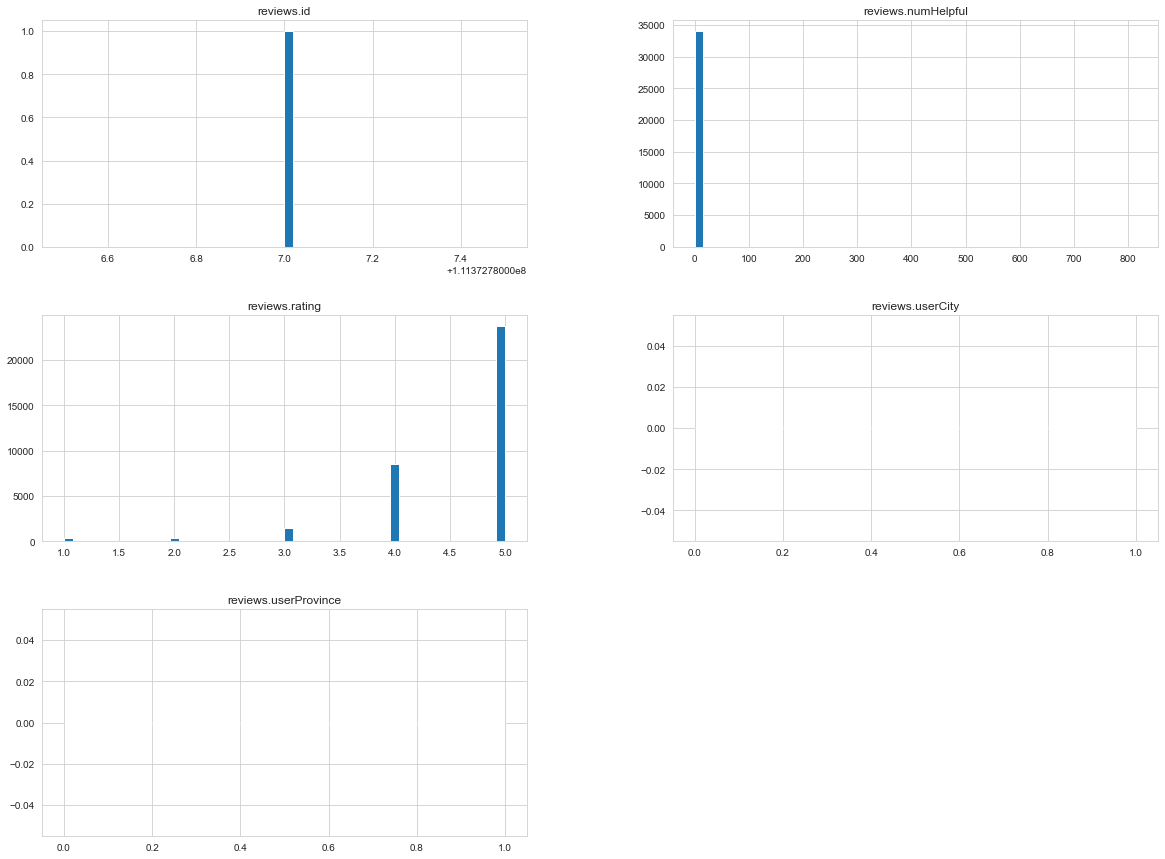

In [8]:
# Builds histogram and set the number of bins and fig size (width, height)
data.hist(bins=50, figsize=(20,15))
plt.show()


### Based on the distributions above:

* reviews.numHelpful: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful
* reviews.rating: Majority of examples were rated highly (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined

# 2 Split into Train/Test

*  Before we explore the dataset we’re going to split it into training set and test sets
* Our goal is to eventually train a sentiment analysis classifier
* Since the majority of reviews are positive (5 stars), we will need to do a stratified split on the reviews score to ensure that we don’t train the classifier on imbalanced data
* To use sklearn’s Stratified ShuffleSplit class, we’re going to remove all samples that have NAN in review score, then covert all review scores to integer datatype

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


<ipython-input-9-1ba774e60b70>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)


In [10]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

### Check to see if train/test sets were stratified proportionately in comparison to raw data.

In [11]:
len(strat_train)

27701

In [68]:
strat_train["reviews.rating"].value_counts()/len(strat_train) 
#showing value of particular rating in total percentage 

5.0    0.685174
4.0    0.247031
3.0    0.043500
2.0    0.011696
1.0    0.011588
Name: reviews.rating, dtype: float64

In [15]:
len(strat_test)

6926

In [16]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.689864
4.0    0.244730
3.0    0.042160
1.0    0.011406
2.0    0.011118
Name: reviews.rating, dtype: float64

# 3 Data Exploration (Training Set)
    We will use regular expressions to clean out any unfavorable characters in our dataset, and then preview what the data looks like after the cleaning.

In [17]:
reviews = strat_train.copy()
reviews.head(2)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
4349,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-11-28T00:00:00.000Z,2017-05-21T04:06:08Z,"2017-04-30T00:26:00.000Z,2017-06-07T08:10:00.000Z",...,True,NaN,5.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,we bought this for my 11 year old daughter and...,great for all ages,NaN,NaN,Mark
30776,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2017-01-06T00:00:00.000Z,2017-09-20T05:35:55Z,"2017-08-25T22:21:42.763Z,2017-08-19T09:26:46.1...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,"I have the Roku 4, and new Apple TV, this stre...",Great streaming box,NaN,NaN,Techno


Next, we will explore the following columns:

* asins
* name
* reviews.rating
* reviews.doRecommend
* (reviews.numHelpful – not possible since numHelpful is only between 0-13 as per previous analysis in Raw Data)
* (reviews.text – not possible since text is in long words).
-    
 Also, we will explore columns to asins

## 4.1 names / ASINs

In [18]:
len(reviews["name"].unique()), len(reviews["asins"].unique()) 

(47, 35)

In [19]:
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 15  reviews.sourceUR

Working hypothesis: there are only 35 products based on the training data ASINs

* One for each ASIN, but more product names (47)
* ASINs are what’s important here since we’re concerned with products. There’s a one to many relationship between ASINs and names
* A single ASIN can have many names due to different vendor listings
* There could also a lot of missing names/more unique names with slight variations in title (ie. 8gb vs 8 gb, NAN for product names)

In [20]:
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00IOY8XWQ               [Kindle Paperwhite,,,\r\nKindle Paperwhite,,,,...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE                            [Echo (White),,,\r\nEcho (White),,,]
B00U3FPN4U         

### Confirmed our hypothesis that each ASIN can have multiple names. Therefore we should only really concern ourselves with which ASINs do well, not the product names.

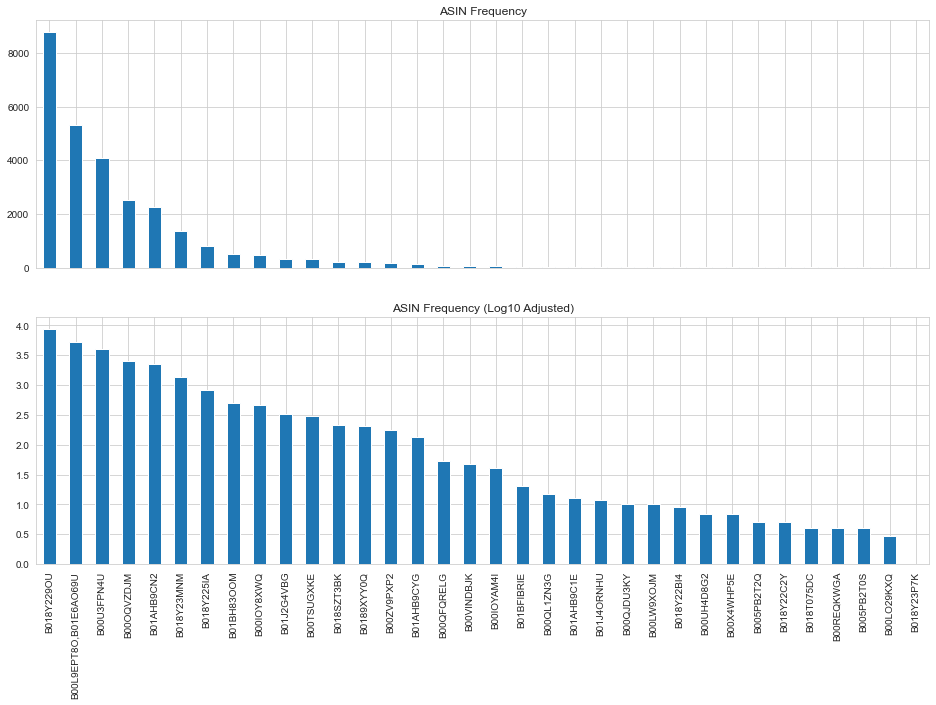

In [22]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, 
                                               title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

* Based on the bar graph for ASINs, we see that certain products have significantly more reviews than other products, which may indicate a higher sale in those specific products
* We also see that the ASINs have a “right tailed” distribution which can also suggest that certain products have higher sales which can correlate to the higher ASINs frequencies in the reviews
* We also took the log of the ASINs to normalize the data, in order display an in-depth picture of each ASINs, and we see that the distribution still follows a “right tailed” distribution

### This answers the first question that certain ASINs (products) have better sales, while other ASINs have lower sale, and in turn dictates which products should be kept or dropped.

In [23]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.5841072525566435

## 4.2 reviews.rating / ASINs

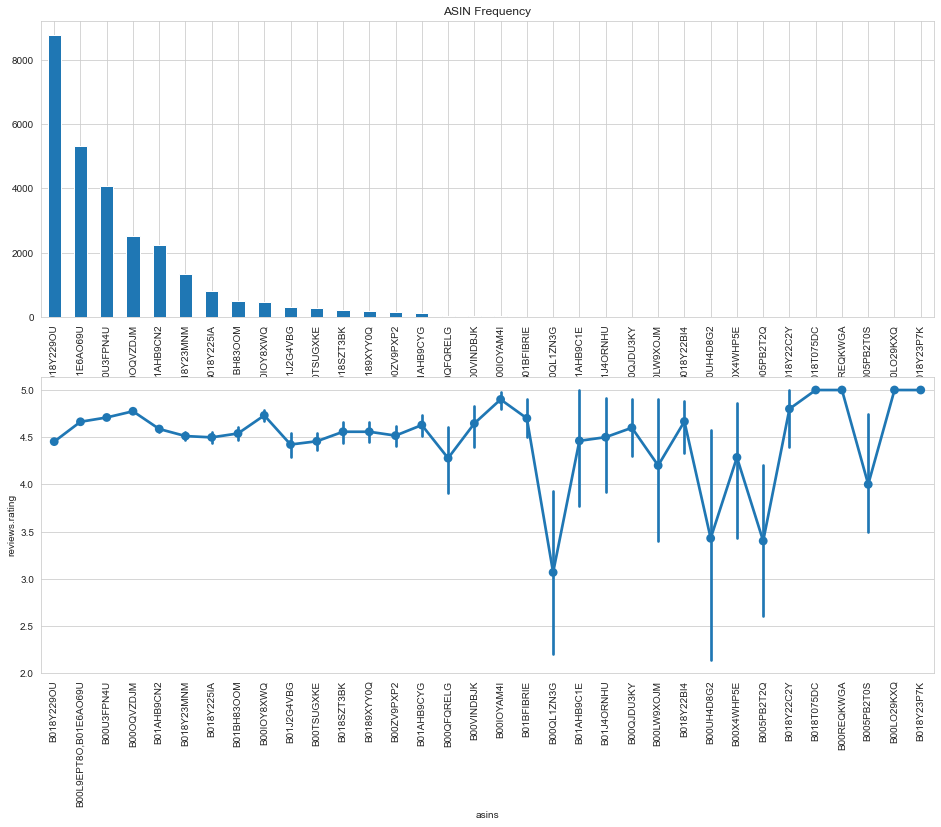

In [24]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

* 1a) The most frequently reviewed products have their average review ratings in the 4.5 – 4.8 range, with little variance
* 1b) Although there is a slight inverse relationship between the ASINs frequency level and average review ratings for the first 4 ASINs, this relationship is not significant since the average review for the first 4 ASINs are rated between 4.5 – 4.8, which is considered good overall reviews
* 2a) For ASINs with lower frequencies as shown on the bar graph (top), we see that their corresponding average review ratings on the point-plot graph (bottom) has significantly higher variance as shown by the length of the vertical lines. As a result, we suggest that, the average review ratings for ASINs with lower frequencies are not significant for our analysis due to high variance
* 2b) On the other hand, due to their lower frequencies for ASINs with lower frequencies, we suggest that this is a result of lower quality products
* 2c) Furthermore, the last 4 ASINs have no variance due to their significantly lower frequencies, and although the review ratings are a perfect 5.0, but we should not consider the significance of these review ratings due to lower frequency as explained in 2a)

**Note that point-plot graph automatically takes the average of the review.rating data**

## 4.3 reviews.doRecommend / ASINs

In [2]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix,
              data=reviews)
plt.xticks(rotation=90)
plt.show()



NameError: name 'plt' is not defined

* From this analysis, we can see that the first 19 ASINs show that consumers recommend the product, which is consistent with the “reviews.rating / ASINs” analysis above, where the first 19 ASINs have good ratings between 4.0 to 5.0
* The remaining ASINs have fluctuating results due to lower sample size, which should not be considered.

**Note: reviews.text will be analyzed in Sentiment Analysis**

# 5 Correlations

In [28]:
corr_matrix = reviews.corr()
corr_matrix

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.00000,-0.04372,NaN,NaN
reviews.rating,NaN,-0.04372,1.00000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [32]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8772
"B00L9EPT8O,B01E6AO69U",5304
B00U3FPN4U,4076
B00OQVZDJM,2525
B01AHB9CN2,2241


In [30]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.400000
B00IOY8XWQ,4.731183
B00IOYAM4I,4.900000
"B00L9EPT8O,B01E6AO69U",4.663462


In [33]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8772,4.453032
"B00L9EPT8O,B01E6AO69U",5304,4.663462
B00U3FPN4U,4076,4.709028
B00OQVZDJM,2525,4.774653
B01AHB9CN2,2241,4.586792
B018Y23MNM,1346,4.511887
B018Y225IA,811,4.498150
B01BH83OOM,504,4.539683
B00IOY8XWQ,465,4.731183
B01J2G4VBG,322,4.422360


,asins,reviews.rating
asins,1.000000,0.099791
reviews.rating,0.099791,1.000000


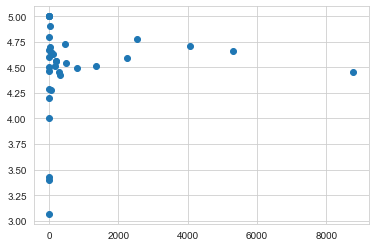

In [34]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

From our analysis in data exploration above between ASINs and reviews.rating, we discovered that there are many ASINs with low occurrence that have high variances, as a result we concluded that theses low occurrence ASINs are not significant in our analysis given the low sample size. 

Similarly in our correlation analysis between ASINs and reviews.rating, we see that there is almost no correlation which is consistent with our findings.

# 6 Sentiment Analysis

Using the features in place, we will build a classifier that can determine a review’s sentiment.

## 6.1 Set Target Variable (Sentiments)

In [36]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

4349     Positive
30776    Positive
28775     Neutral
1136     Positive
17803    Positive
7336     Positive
32638    Positive
13995    Positive
6728     Negative
22009    Positive
11047    Positive
22754    Positive
5578     Positive
11673    Positive
19168    Positive
14903    Positive
30843    Positive
5440     Positive
28940    Positive
31258    Positive
Name: Sentiment, dtype: object

In [38]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


## 6.2 Extract Features

Here we will turn content into numerical feature vectors using the Bag of Words strategy:

* Assign fixed integer id to each word occurrence (integer indices to word occurrence dictionary)
* X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (our training set)
In order to implement the Bag of Words strategy, we will use SciKit-Learn’s CountVectorizer to performs the following:

* Text preprocessing:
    - Tokenization (breaking sentences into words)
    - Stopwords (filtering “the”, “are”, etc)
* Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
* Feature Vector (converts the dictionary of text documents into a feature vector)

In [39]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12526)

Here we have 27,701 training samples and 12,526 distinct words in our training sample.

Also, with longer documents, we typically see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we will use TfidfTransformer to reduce this redundancy:

* erm Frequencies (Tf) divides number of occurrences for each word by total number of words
* Term Frequencies times Inverse Document Frequency (Tfidf) downscales the weights of each word (assigns less value to unimportant stop words ie. “the”, “are”, etc)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12526)

## 6.3 Building a Pipeline from the Extracted Features

We will use Multinominal Naive Bayes as our Classifier

* Multinominal Niave Bayes is most suitable for word counts where data are typically represented as word vector counts (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i
* Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [43]:
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
predictedMultiNB

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [45]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, 
                             predictedMultiNB)))

Accuracy: 0.9344498989315623


In [54]:
X_test

20609    Had a gen 1 Kindle and so glad I moved up to t...
14277    I love it. Especially for the price..............
21986    Very functional, easy set-up and great so be q...
4401     Bought this tablet for my daughter so far so g...
8838     We bought the tablet for work, but the only ap...
                               ...                        
2031     Works flawlessly. Good contender to my brother...
2350     This is an awesome tablet, fast, great HD disp...
16698    These kindle tablets are beginning to get pret...
3414                                         Good product.
28177    This just is so much fun to use. So easy to as...
Name: reviews.text, Length: 6926, dtype: object

In [59]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, 
                             predictedLinearSVC)))

Accuracy: 0.9393589373375686


In [65]:
new_text = ["The tablet is good, really liked it.", # positive
            "The tablet is ok, but it works fine.", # neutral
            "The tablet is not good, does not work waste ."] # negative

clf_linearSVC_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Negative'], dtype=object)

### Results:

* After testing some arbitrary reviews, it seems that our features is performing correctly with Positive, Neutral, Negative results